###커버드 콜(Covered Call)
커버드 콜(Covered Call)은 주식 투자 전략의 하나로, 투자자가 이미 보유하고 있는 주식에 대해 콜 옵션을 매도하는 것을 말합니다. 이 전략은 주식 가격이 일정 범위 내에서 움직일 것으로 예상될 때 사용됩니다.



In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display



# 주식 가격 데이터 생성
dates = pd.date_range('2023-01-01', periods=100)
stock_prices = np.random.normal(loc=100, scale=10, size=len(dates))
stock_data = pd.DataFrame({'Date': dates, 'Stock Price': stock_prices})

# 옵션 매도 가격 설정
strike_price = 105
premium_received = 2  # 옵션 매도 시 받은 프리미엄

# Covered Call 수익 계산 함수
def calculate_covered_call(stock_data, strike_price, premium_received):
    # 주식 매도 이익/손실 계산
    stock_data['Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
                                         strike_price - stock_data['Stock Price'],
                                         0)
    # 총 수익 계산 (주식 매도 이익/손실 + 프리미엄)
    stock_data['Total Profit'] = stock_data['Profit/Loss'] + premium_received
    return stock_data

# 수익 계산 실행
covered_call_results = calculate_covered_call(stock_data, strike_price, premium_received)

# 결과 출력
print(covered_call_results)
display(covered_call_results)

         Date  Stock Price  Profit/Loss  Total Profit
0  2023-01-01    76.825910     0.000000      2.000000
1  2023-01-02   113.440926    -8.440926     -6.440926
2  2023-01-03   120.053115   -15.053115    -13.053115
3  2023-01-04    87.394181     0.000000      2.000000
4  2023-01-05   101.201223     0.000000      2.000000
..        ...          ...          ...           ...
95 2023-04-06   108.891988    -3.891988     -1.891988
96 2023-04-07    85.879311     0.000000      2.000000
97 2023-04-08   104.384293     0.000000      2.000000
98 2023-04-09   118.275678   -13.275678    -11.275678
99 2023-04-10   101.853767     0.000000      2.000000

[100 rows x 4 columns]


,Date,Stock Price,Profit/Loss,Total Profit
0,2023-01-01,76.825910,0.000000,2.000000
1,2023-01-02,113.440926,-8.440926,-6.440926
2,2023-01-03,120.053115,-15.053115,-13.053115
3,2023-01-04,87.394181,0.000000,2.000000
4,2023-01-05,101.201223,0.000000,2.000000
...,...,...,...,...
95,2023-04-06,108.891988,-3.891988,-1.891988
96,2023-04-07,85.879311,0.000000,2.000000
97,2023-04-08,104.384293,0.000000,2.000000
98,2023-04-09,118.275678,-13.275678,-11.275678


[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-41a87a30dcc1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
<ipython-input-3-41a87a30dcc1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Total Profit'] = stock_data['Profit/Loss'] + premium_received


            Stock Price  Profit/Loss  Total Profit
Date                                              
2023-01-03   125.070000     0.000000      5.000000
2023-01-04   126.360001     0.000000      5.000000
2023-01-05   125.019997     0.000000      5.000000
2023-01-06   129.619995     0.000000      5.000000
2023-01-09   130.149994     0.000000      5.000000
...                 ...          ...           ...
2023-12-22   193.600006   -43.600006    -38.600006
2023-12-26   193.050003   -43.050003    -38.050003
2023-12-27   193.149994   -43.149994    -38.149994
2023-12-28   193.580002   -43.580002    -38.580002
2023-12-29   192.529999   -42.529999    -37.529999

[250 rows x 3 columns]


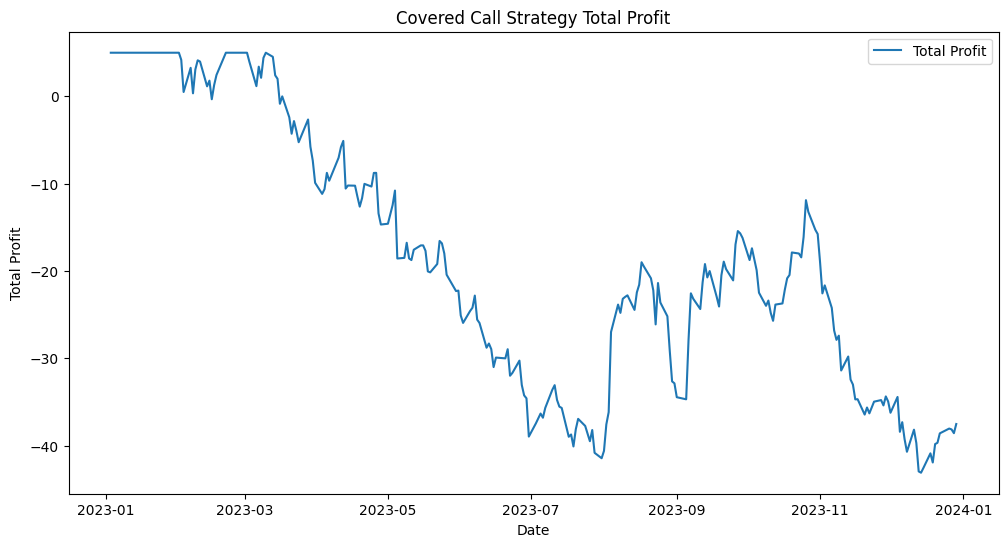

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# 옵션 매도 가격과 프리미엄 설정 (예시)
strike_price = 150
premium_received = 5  # 옵션 매도 시 받은 프리미엄 (예시)

# Covered Call 수익 계산 함수
def calculate_covered_call(stock_data, strike_price, premium_received):
    # 주식 매도 이익/손실 계산
    stock_data['Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
                                         strike_price - stock_data['Stock Price'],
                                         0)
    # 총 수익 계산 (주식 매도 이익/손실 + 프리미엄)
    stock_data['Total Profit'] = stock_data['Profit/Loss'] + premium_received
    return stock_data

# 수익 계산 실행
covered_call_results = calculate_covered_call(data, strike_price, premium_received)

# 결과 출력
print(covered_call_results)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(covered_call_results.index, covered_call_results['Total Profit'], label='Total Profit')
plt.title('Covered Call Strategy Total Profit')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-4-fe1b62174083>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-4-fe1b62174083>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
<ipython-input-4-fe1b62174083>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

            Stock Price  Stock Return  Total Profit  Total Return
Date                                                             
2023-01-03   125.070000      0.000000      5.000000      0.000000
2023-01-04   126.360001      0.010314      6.290001      0.050292
2023-01-05   125.019997     -0.010605      3.659996      0.028965
2023-01-06   129.619995      0.036794      9.599998      0.076788
2023-01-09   130.149994      0.004089      5.529999      0.042663
...                 ...           ...           ...           ...
2023-12-22   193.600006     -0.005547    -38.600006     -0.198274
2023-12-26   193.050003     -0.002841    -38.050003     -0.196539
2023-12-27   193.149994      0.000518    -38.149994     -0.197617
2023-12-28   193.580002      0.002226    -38.580002     -0.199741
2023-12-29   192.529999     -0.005424    -37.529999     -0.193873

[250 rows x 4 columns]


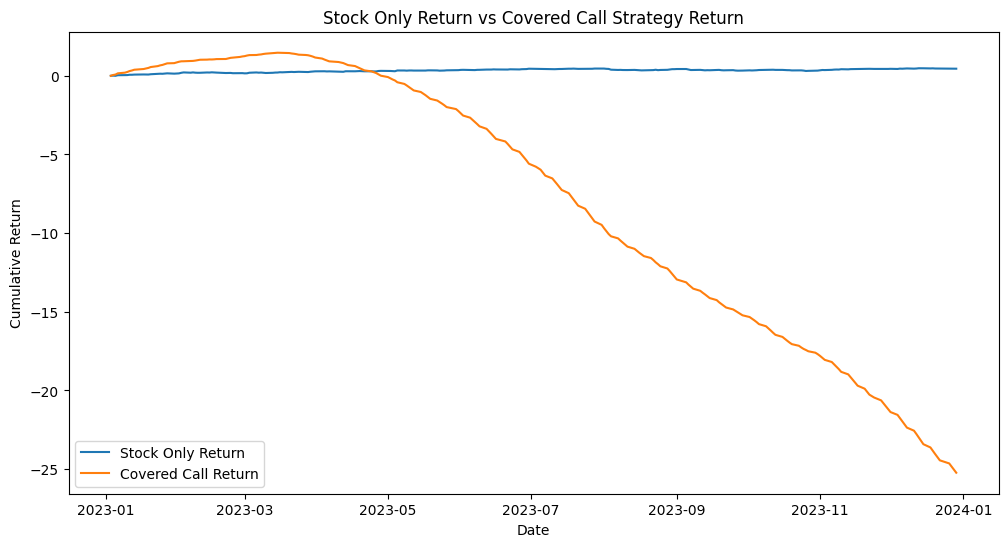

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Covered Call 설정
strike_price = 150
premium_received = 5  # 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Covered Call 수익 계산 함수
def calculate_covered_call(stock_data, strike_price, premium_received):
    # 주식 매도 이익/손실 계산
    stock_data['Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
                                         strike_price - stock_data['Stock Price'],
                                         stock_data['Stock Price'] - stock_data['Stock Price'].shift(1))
    stock_data['Profit/Loss'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    # 총 수익 계산 (주식 매도 이익/손실 + 프리미엄)
    stock_data['Total Profit'] = stock_data['Profit/Loss'] + premium_received

    # 총 수익률 계산
    stock_data['Total Return'] = stock_data['Total Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Total Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
covered_call_results = calculate_covered_call(data, strike_price, premium_received)

# 결과 출력
print(covered_call_results[['Stock Price', 'Stock Return', 'Total Profit', 'Total Return']])

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(covered_call_results.index, covered_call_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(covered_call_results.index, covered_call_results['Total Return'].cumsum(), label='Covered Call Return')
plt.title('Stock Only Return vs Covered Call Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
